In [6]:
# Import the required functions from your lunar library
from lunar.find_contours import find_contours_from_videos
from lunar.plot_contours import plot_contours
from lunar.identify_glare import process_large_file
from lunar.label_tanx import analyze_contours
from lunar import match_cameras
from lunar import plot_matched
from lunar import smooth_contours
from lunar.plot_glare_contours import plot_glare_contours




In [2]:
# Define parameters for processing first video
video_pattern = '/Users/oakley/Downloads/out_*.mp4'
output_suffix = '22Jul2024.tsv'
black_threshold = 200
min_area = 15
max_area = 1000
brightness_threshold = 100
threads = 2


# Process video and generate contours file
# This takes several hours to process
# Change to code to execute if necessary

find_contours_from_videos(
    video_pattern=video_pattern,
    black=black_threshold,
    minArea=min_area,
    maxArea=max_area,
    brightnessThreshold=brightness_threshold,
    threads=threads,
    outfile=output_suffix
)


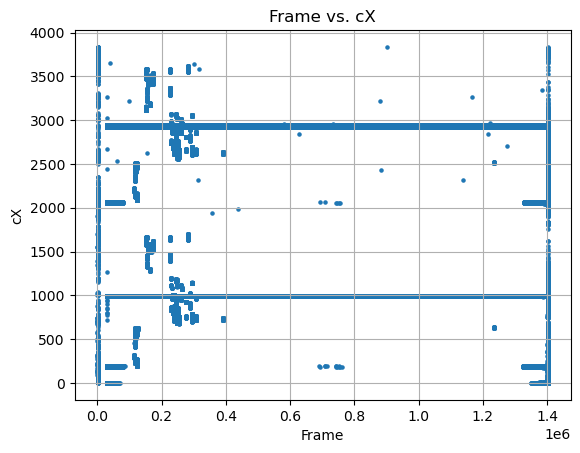

In [3]:
# Plot the contours data
output_file = 'contours_' + output_suffix
plot_contours(output_file)

## Glare is rather slow

In [4]:
# Identify glare in contour file
process_large_file(
    input_file='contours_' + output_suffix,
    output_file='glare_' + output_suffix,
    min_cluster_size=4000,
    eps=0.3,
    min_samples=50,
    chunksize=100000
)

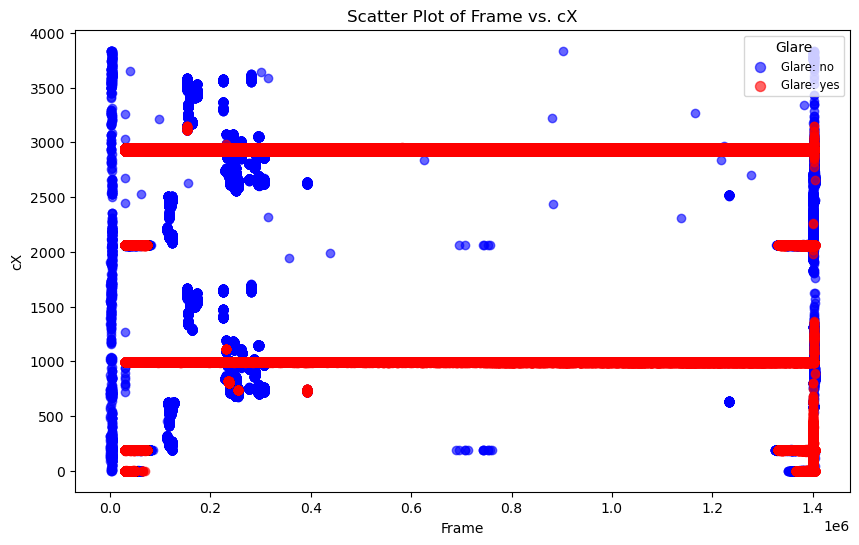

In [7]:
# Plot the glare-processed results
plot_glare_contours('glare_' + output_suffix, color_by_cluster=False)  # Change last to True to color by cluster

In [8]:
# Analyze the contours to label tanks
tank_boundaries = [185, 655, 1210, 1705, 2062, 2525, 3096, 3635]
analyze_contours('glare_' + output_suffix, tank_boundaries)

Removed 4799941 rows labeled as glare.
Analysis complete. Results saved to analyzed_glare_22Jul2024.tsv


,frame,cX,cY,area,minI,maxI,meanI,video,glare,camera,tank,cXtank
0,14,705.0,247.0,259.0,201.0,255.0,220.134796,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,50.0
1,14,879.0,256.0,732.0,201.0,255.0,219.859551,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,224.0
2,14,687.0,266.0,20.0,201.0,223.0,207.366667,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,32.0
3,14,710.0,265.0,272.5,201.0,248.0,214.945619,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,55.0
4,14,1907.0,337.0,774.5,201.0,255.0,226.265161,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,noise,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4848301,1403633,2669.0,763.0,29.5,201.0,231.0,214.186047,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,144.0
4848303,1403633,2665.0,943.0,20.0,201.0,216.0,208.172414,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,140.0
4848304,1403633,853.0,949.0,32.5,201.0,214.0,206.441860,/home/local/ADS/oakley/labdata/users/McKinley/...,no,left,left_tank2,198.0
4848305,1403633,2652.0,967.0,25.5,201.0,224.0,209.777778,/home/local/ADS/oakley/labdata/users/McKinley/...,no,right,right_tank2,127.0


In [9]:
match_cameras(
    'analyzed_glare_' + output_suffix,  # Input file
    'matched_' + output_suffix,         # Output file
    distance_x=200,                     # Maximum allowed difference for cX
    distance_y=100                      # Maximum allowed difference for cY
)


Updated data has been written to matched_22Jul2024.tsv


Plot saved to smoothed_output.png


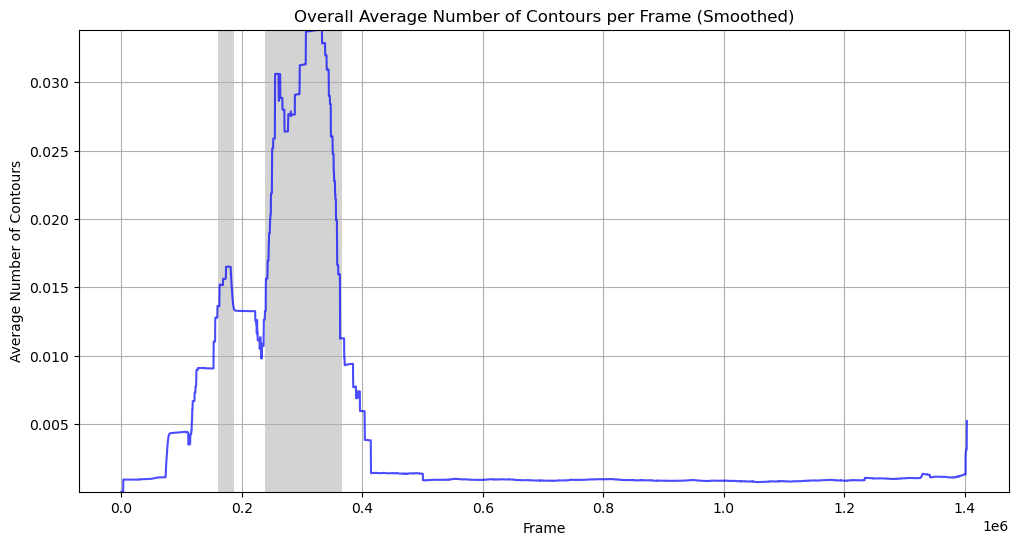

In [16]:
smooth_contours(
    input_file='matched_' + output_suffix,
    output_file='smoothed_output.png',
    window=108000,
    pad=True  #Pads beginning with zeros to not get edge artifact
)